In [1]:
import pandas as pd
import re
import seaborn as sns
import numpy as np

# #0 Importando o(s) datasets

In [2]:
LeagueofLegends = pd.read_csv('Datasets/LeagueofLegends.csv')
dfKills = pd.read_csv('Datasets/kills.csv')
dfmatchinfo = pd.read_csv('Datasets/matchinfo.csv')


# #1 Limpeza e organização dos dados

In [3]:
# Primeiro verifico o tipo de dado que compõe a coluna, se ele está ideal para uso ou se deve ser alterado
print(type(LeagueofLegends['League'][0]))
# Como a coluna League trata-se da liga na qual o dado foi obtido, logo, uma string
print(type(LeagueofLegends['Year'][0]))
# A coluna ano é a coluna do ano no qual o dado foi obtido, logo, um numero inteiro
type(LeagueofLegends['Season'][0])
type(LeagueofLegends['Type'][0])
type(LeagueofLegends['blueTeamTag'][0])
type(LeagueofLegends['bResult'][0])
type(LeagueofLegends['rResult'][0])
type(LeagueofLegends['redTeamTag'][0])
type(LeagueofLegends['gamelength'][0]) #Em minutos
type(LeagueofLegends['golddiff'][0]) #Transformar em Lista
type(LeagueofLegends['goldblue'][0]) #Transformar em lista
type(LeagueofLegends['bTowers'][0]) #Transformar em lista (Time,Lane,Type)
type(LeagueofLegends['bInhibs'][0]) #Transformar em lista (Time, Type)
type(LeagueofLegends['bDragons'][0]) #Transformar em lista (Time, Type), encontrar forma de contar dragões
type(LeagueofLegends['bBarons'][0]) #Transformar em lista(qnt, Time)
type(LeagueofLegends['bHeralds'][0]) #Transformar em lista(qnt, Time)
type(LeagueofLegends['goldred'][0]) #Transformar em lista
type(LeagueofLegends['rTowers'][0]) #Transformar em lista (Time,Lane,Type)
type(LeagueofLegends['rInhibs'][0]) #Transformar em lista (Time, Type)
type(LeagueofLegends['rDragons'][0]) #Transformar em lista (Time, Type), encontrar forma de contar dragões
type(LeagueofLegends['rBarons'][0]) #Transformar em lista(qnt, Time)
type(LeagueofLegends['rHeralds'][0]) #Transformar em lista(qnt, Time)

type(LeagueofLegends['blueTopChamp'][0])
type(LeagueofLegends['goldblueTop'][0]) #Transsformar em lista
type(LeagueofLegends['blueJungleChamp'][0])
type(LeagueofLegends['goldblueJungle'][0]) #Transsformar em lista
type(LeagueofLegends['redMiddleChamp'][0])
type(LeagueofLegends['goldblueMiddle'][0]) #Transsformar em lista
type(LeagueofLegends['blueADCChamp'][0])
type(LeagueofLegends['goldblueADC'][0]) #Transsformar em lista
type(LeagueofLegends['blueSupportChamp'][0])
type(LeagueofLegends['goldblueSupport'][0]) #Transsformar em lista
type(LeagueofLegends['blueBans'][0]) #Transformar em lista
type(LeagueofLegends['blueTop'][0])
type(LeagueofLegends['blueJungle'][0])
type(LeagueofLegends['blueMiddle'][0])
type(LeagueofLegends['blueADC'][0])
type(LeagueofLegends['blueSupport'][0])

type(LeagueofLegends['redTopChamp'][0])
type(LeagueofLegends['goldredTop'][0]) #Transsformar em lista
type(LeagueofLegends['redJungleChamp'][0])
type(LeagueofLegends['goldredJungle'][0]) #Transsformar em lista
type(LeagueofLegends['redMiddleChamp'][0])
type(LeagueofLegends['goldredMiddle'][0]) #Transsformar em lista
type(LeagueofLegends['redADCChamp'][0])
type(LeagueofLegends['goldredADC'][0]) #Transsformar em lista
type(LeagueofLegends['redSupportChamp'][0])
type(LeagueofLegends['goldredSupport'][0]) #Transsformar em lista
type(LeagueofLegends['redBans'][0]) #Transformar em lista
type(LeagueofLegends['redTop'][0])
type(LeagueofLegends['redJungle'][0])
type(LeagueofLegends['redMiddle'][0])
type(LeagueofLegends['redADC'][0])
type(LeagueofLegends['redSupport'][0])


<class 'str'>
<class 'numpy.int64'>


str

In [46]:
#Função para tranasformação simples de str para lista
def transListSimple(data):
    temp = []
    print('eita')
    if(type(data[0]) == str):
        print('fudeo')
        for i in data:
            lista = []
            i = i.replace('[','').replace(']','').split(', ')
            for j in range(len(i)):
                lista.append(int(i[j]))
            temp.append(lista)
            print(lista)
        return temp
    else:
        return data

In [48]:
LeagueofLegends['golddiff'] = transListSimple(LeagueofLegends['golddiff'])

eita
fudeo
[0, 0, -14, -65, -268, -431, -488, -789, -494, -625, -1044, -313, -760, -697, -790, -611, 240, 845, 797, 1422, 987, 169, 432, 491, 1205, 1527, 1647, 1847, 3750, 4719, 3561, 3367, 2886, 2906, 4411, 4473, 4639, 4762, 4686, 6057]


ValueError: Length of values (1) does not match length of index (7620)

In [36]:
LeagueofLegends['golddiff'] = transListSimple(LeagueofLegends['golddiff'])
LeagueofLegends['goldblue'] = transListSimple(LeagueofLegends['goldblue'])
LeagueofLegends['goldred'] = transListSimple(LeagueofLegends['goldred'])
LeagueofLegends['goldblueTop'] = transListSimple(LeagueofLegends['goldblueTop'])
LeagueofLegends['goldblueJungle'] = transListSimple(LeagueofLegends['goldblueJungle'])
LeagueofLegends['goldblueMiddle'] = transListSimple(LeagueofLegends['goldblueMiddle'])
LeagueofLegends['goldblueADC'] = transListSimple(LeagueofLegends['goldblueADC'])
LeagueofLegends['goldblueSupport'] = transListSimple(LeagueofLegends['goldblueSupport'])
LeagueofLegends['blueBans'] = transListSimple(LeagueofLegends['blueBans'])
LeagueofLegends['goldredTop'] = transListSimple(LeagueofLegends['goldredTop'])
LeagueofLegends['goldredJungle'] = transListSimple(LeagueofLegends['goldredJungle'])
LeagueofLegends['goldredMiddle'] = transListSimple(LeagueofLegends['goldredMiddle'])
LeagueofLegends['goldredADC'] = transListSimple(LeagueofLegends['goldredADC'])
LeagueofLegends['goldredSupport'] = transListSimple(LeagueofLegends['goldredSupport'])
LeagueofLegends['redBans'] = transListSimple(LeagueofLegends['redBans'])


In [37]:
LeagueofLegends['golddiff'][0]

'[0, 0, -14, -65, -268, -431, -488, -789, -494, -625, -1044, -313, -760, -697, -790, -611, 240, 845, 797, 1422, 987, 169, 432, 491, 1205, 1527, 1647, 1847, 3750, 4719, 3561, 3367, 2886, 2906, 4411, 4473, 4639, 4762, 4686, 6057]'

In [ ]:
LeagueofLegends

,League,Year,Season,Type,blueTeamTag,bResult,rResult,redTeamTag,gamelength,golddiff,...,redMiddleChamp,goldredMiddle,redADC,redADCChamp,goldredADC,redSupport,redSupportChamp,goldredSupport,redBans,Address
0,NALCS,2015,Spring,Season,TSM,1,0,C9,40,"[0, 0, -14, -65, -268, -431, -488, -789, -494,...",...,Fizz,"[475, 475, 552, 842, 1178, 1378, 1635, 1949, 2...",Sneaky,Sivir,"[475, 475, 532, 762, 1097, 1469, 1726, 2112, 2...",LemonNation,Thresh,"[515, 515, 577, 722, 911, 1042, 1194, 1370, 14...","['Tristana', 'Leblanc', 'Nidalee']",http://matchhistory.na.leagueoflegends.com/en/...
1,NALCS,2015,Spring,Season,CST,0,1,DIG,38,"[0, 0, -26, -18, 147, 237, -152, 18, 88, -242,...",...,Azir,"[475, 475, 552, 786, 1097, 1389, 1660, 1955, 2...",CoreJJ,Corki,"[475, 475, 532, 868, 1220, 1445, 1732, 1979, 2...",KiWiKiD,Annie,"[515, 515, 583, 752, 900, 1066, 1236, 1417, 15...","['RekSai', 'Janna', 'Leblanc']",http://matchhistory.na.leagueoflegends.com/en/...
2,NALCS,2015,Spring,Season,WFX,1,0,GV,40,"[0, 0, 10, -60, 34, 37, 589, 1064, 1258, 913, ...",...,Azir,"[475, 475, 533, 801, 1006, 1233, 1385, 1720, 1...",Cop,Corki,"[475, 475, 533, 781, 1085, 1398, 1782, 1957, 2...",BunnyFuFuu,Janna,"[515, 515, 584, 721, 858, 1002, 1168, 1303, 14...","['Leblanc', 'Zed', 'RekSai']",http://matchhistory.na.leagueoflegends.com/en/...
3,NALCS,2015,Spring,Season,TIP,0,1,TL,41,"[0, 0, -15, 25, 228, -6, -243, 175, -346, 16, ...",...,Lulu,"[475, 475, 532, 771, 1046, 1288, 1534, 1776, 2...",KEITH,KogMaw,"[475, 475, 532, 766, 1161, 1438, 1776, 1936, 2...",Xpecial,Janna,"[515, 515, 583, 721, 870, 1059, 1205, 1342, 15...","['RekSai', 'Rumble', 'LeeSin']",http://matchhistory.na.leagueoflegends.com/en/...
4,NALCS,2015,Spring,Season,CLG,1,0,T8,35,"[40, 40, 44, -36, 113, 158, -121, -191, 23, 20...",...,Lulu,"[475, 475, 532, 807, 1042, 1338, 1646, 1951, 2...",Maplestreet8,Corki,"[475, 475, 532, 792, 1187, 1488, 1832, 2136, 2...",Dodo8,Annie,"[475, 475, 538, 671, 817, 948, 1104, 1240, 136...","['Rumble', 'Sivir', 'Rengar']",http://matchhistory.na.leagueoflegends.com/en/...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7615,TCL,2018,Spring,Season,YC,0,1,SUP,34,"[0, 0, -18, -95, 45, -87, -117, 199, 126, 92, ...",...,Veigar,"[500, 500, 632, 982, 1258, 1667, 2060, 2390, 2...",Zeitnot,Xayah,"[500, 500, 564, 1027, 1320, 1727, 1963, 2276, ...",SnowFlower,Rakan,"[500, 500, 566, 801, 1004, 1234, 1463, 1674, 1...","['Ornn', 'Kalista', 'Ryze', 'Alistar', 'Shen']",https://matchhistory.euw.leagueoflegends.com/e...
7616,TCL,2018,Spring,Season,GAL,0,1,DP,39,"[0, 0, -86, -39, -207, -349, -60, -140, 187, -...",...,Ryze,"[500, 500, 612, 1000, 1193, 1626, 1979, 2318, ...",Ruvelius,Caitlyn,"[500, 500, 621, 977, 1420, 1809, 2047, 2413, 2...",Japone,Braum,"[500, 500, 587, 790, 1107, 1335, 1472, 1616, 1...","['Zoe', 'KogMaw', 'JarvanIV', 'Ornn', 'Rengar']",https://matchhistory.euw.leagueoflegends.com/e...
7617,OPL,2018,Spring,Season,SIN,0,1,DW,24,"[0, -8, -6, 116, 103, -92, -470, -958, -1998, ...",...,Malzahar,"[500, 500, 615, 903, 1225, 1617, 1976, 2304, 2...",k1ng,Ezreal,"[500, 508, 592, 986, 1400, 1753, 2196, 2538, 3...",Cupcake,Taric,"[500, 500, 585, 770, 976, 1222, 1446, 1627, 19...","['Azir', 'Kalista', 'Braum', 'Maokai', 'Alistar']",https://matchhistory.na.leagueoflegends.com/en...
7618,OPL,2018,Spring,Season,LGC,1,0,TTC,35,"[0, 0, -97, 33, 351, 284, 299, 263, 403, 623, ...",...,Veigar,"[500, 500, 561, 931, 1223, 1631, 1987, 2315, 2...",Low,Sivir,"[500, 500, 634, 930, 1304, 1691, 2042, 2384, 2...",Tilting,Janna,"[500, 500, 592, 788, 1006, 1251, 1490, 1704, 1...","['Kalista', 'Galio', 'Gnar', 'Jayce', 'Sejuani']",https://matchhistory.na.leagueoflegends.com/en...


: 

## APAGAR CELULA DE BAIXO

In [ ]:
def killDF(column):
    out = []
    for i in range(len(LeagueofLegends[f'{column}'])):   
        string = LeagueofLegends[f'{column}'][i][1:-1:]
        lista = string.split('], [')
        lista[0] = lista[0][1::] #primeiro elemento sem o '['
        lista[len(lista)-1] = lista[len(lista)-1][:-1:] #ultimo elemento sem o ']'

        # ------------------------------------------------------
        temp = []
        for j in lista:    
            if (j != ""):
                c = j.replace(re.search(r'(?<=\[).*(?=\])', j)[0], '') #retirando a lista da string
                d = c.split(', ')

                d[0] = float(d[0].replace('.',''))/10**len(re.search(r'(?<=\.).*', d[0])[0])
                d[1] = d[1].replace("'","")
                d[2] = d[2].replace("'","")
                d[3] = re.search(r'(?<=\[).*(?=\])', j)[0].split(',')
                if d[4] != "": d[4] = float(d[4])
                if d[5] != "": d[5] = float(d[5])
                
                if (len(d[3]) > 0):
                    for k in range(1,len(d[3])):
                        d[3][k] = d[3][k].replace("'","")
                    for k in range(len(d[3])):
                        d[3][k] = d[3][k].replace(" '","").replace("'","")

            else:
                d = ['NotKilled']
            temp.append(d)
        out.append(temp)

    return out

: 

In [ ]:
jogos = range(len(dfKills['Address'].unique()))
JogosLink = dfKills['Address'].unique()
df_jogos = pd.DataFrame(data =JogosLink, index=jogos).reset_index()
df_jogos['Address'] = df_jogos[0]
df_jogos['IdJogo'] = df_jogos['index']
df_jogos = df_jogos.drop(columns=['index',0])
df_jogos

,Address,IdJogo
0,http://matchhistory.na.leagueoflegends.com/en/...,0
1,http://matchhistory.na.leagueoflegends.com/en/...,1
2,http://matchhistory.na.leagueoflegends.com/en/...,2
3,http://matchhistory.na.leagueoflegends.com/en/...,3
4,http://matchhistory.na.leagueoflegends.com/en/...,4
...,...,...
7615,https://matchhistory.euw.leagueoflegends.com/e...,7615
7616,https://matchhistory.euw.leagueoflegends.com/e...,7616
7617,https://matchhistory.na.leagueoflegends.com/en...,7617
7618,https://matchhistory.na.leagueoflegends.com/en...,7618


: 

In [ ]:
testea = dfKills.sort_values(by = 'Address')
testea['Address'][len(testea['Address'])-1]

'https://matchhistory.na.leagueoflegends.com/en/#match-details/ESPORTSTMNT03/520903?gameHash=13203adbaa0c1fa5'

: 

In [ ]:
testeb = df_jogos.sort_values(by = 'Address')
testeb['Address'][len(testeb['Address'])-1]

'https://matchhistory.na.leagueoflegends.com/en/#match-details/ESPORTSTMNT03/520903?gameHash=13203adbaa0c1fa5'

: 

In [ ]:
dfKills = dfKills.merge(df_jogos)


: 

In [ ]:
dfKills

,Address,Team,Time,Victim,Killer,Assist_1,Assist_2,Assist_3,Assist_4,x_pos,y_pos,IdJogo
0,http://matchhistory.na.leagueoflegends.com/en/...,bKills,10.820,C9 Hai,TSM Bjergsen,NaN,NaN,NaN,NaN,9229,8469,0
1,http://matchhistory.na.leagueoflegends.com/en/...,bKills,16.286,C9 LemonNation,TSM WildTurtle,TSM Santorin,TSM Bjergsen,TSM Lustboy,NaN,13908,5960,0
2,http://matchhistory.na.leagueoflegends.com/en/...,bKills,18.733,C9 Hai,TSM Bjergsen,TSM Santorin,TSM WildTurtle,TSM Lustboy,NaN,8281,7889,0
3,http://matchhistory.na.leagueoflegends.com/en/...,bKills,18.880,C9 Meteos,TSM Dyrus,TSM Santorin,TSM Bjergsen,TSM WildTurtle,TSM Lustboy,8522,8895,0
4,http://matchhistory.na.leagueoflegends.com/en/...,bKills,27.005,C9 Balls,TSM Bjergsen,TSM Dyrus,TSM Santorin,TSM WildTurtle,TSM Lustboy,8902,7643,0
...,...,...,...,...,...,...,...,...,...,...,...,...
191064,https://matchhistory.na.leagueoflegends.com/en...,rKills,35.086,TTC Papryze,LGC Claire,LGC Ceres,LGC Sybol,LGC Raid,LGC Decoy,6424,9256,7619
191065,https://matchhistory.na.leagueoflegends.com/en...,rKills,40.706,TTC Low,LGC Raid,LGC Ceres,LGC Sybol,LGC Decoy,NaN,1464,2974,7619
191066,https://matchhistory.na.leagueoflegends.com/en...,rKills,40.711,TTC Swathe,LGC Claire,LGC Ceres,LGC Sybol,LGC Raid,LGC Decoy,1014,4828,7619
191067,https://matchhistory.na.leagueoflegends.com/en...,rKills,41.113,TTC Tilting,LGC Claire,LGC Ceres,LGC Sybol,NaN,NaN,693,2924,7619


: 

# Visualização dos dados

In [ ]:
dfKills.loc[dfKills.x_pos == 'TooEarly'] = np.NaN
dfKills.x_pos = dfKills.x_pos.astype(float)
dfKills.loc[dfKills.y_pos == 'TooEarly'] = np.NaN
dfKills.y_pos = dfKills.y_pos.astype(float)

: 

In [ ]:
# sns.scatterplot(dfKills, x='x_pos', y='y_pos')
dfKills.y_pos = dfKills.y_pos.dropna()
dfKills.x_pos = dfKills.x_pos.dropna()

: 

In [ ]:
dfKills

,Address,Team,Time,Victim,Killer,Assist_1,Assist_2,Assist_3,Assist_4,x_pos,y_pos,IdJogo
0,http://matchhistory.na.leagueoflegends.com/en/...,bKills,10.820,C9 Hai,TSM Bjergsen,NaN,NaN,NaN,NaN,9229.0,8469.0,0.0
1,http://matchhistory.na.leagueoflegends.com/en/...,bKills,16.286,C9 LemonNation,TSM WildTurtle,TSM Santorin,TSM Bjergsen,TSM Lustboy,NaN,13908.0,5960.0,0.0
2,http://matchhistory.na.leagueoflegends.com/en/...,bKills,18.733,C9 Hai,TSM Bjergsen,TSM Santorin,TSM WildTurtle,TSM Lustboy,NaN,8281.0,7889.0,0.0
3,http://matchhistory.na.leagueoflegends.com/en/...,bKills,18.880,C9 Meteos,TSM Dyrus,TSM Santorin,TSM Bjergsen,TSM WildTurtle,TSM Lustboy,8522.0,8895.0,0.0
4,http://matchhistory.na.leagueoflegends.com/en/...,bKills,27.005,C9 Balls,TSM Bjergsen,TSM Dyrus,TSM Santorin,TSM WildTurtle,TSM Lustboy,8902.0,7643.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
191064,https://matchhistory.na.leagueoflegends.com/en...,rKills,35.086,TTC Papryze,LGC Claire,LGC Ceres,LGC Sybol,LGC Raid,LGC Decoy,6424.0,9256.0,7619.0
191065,https://matchhistory.na.leagueoflegends.com/en...,rKills,40.706,TTC Low,LGC Raid,LGC Ceres,LGC Sybol,LGC Decoy,NaN,1464.0,2974.0,7619.0
191066,https://matchhistory.na.leagueoflegends.com/en...,rKills,40.711,TTC Swathe,LGC Claire,LGC Ceres,LGC Sybol,LGC Raid,LGC Decoy,1014.0,4828.0,7619.0
191067,https://matchhistory.na.leagueoflegends.com/en...,rKills,41.113,TTC Tilting,LGC Claire,LGC Ceres,LGC Sybol,NaN,NaN,693.0,2924.0,7619.0


: 

In [ ]:
assist_kill = (dfKills.filter(like='Assist_').notna().sum(axis=1)+1)/10
dfKills['qnt_assist'] = assist_kill

: 

Text(0.5, 1.0, 'Kills')

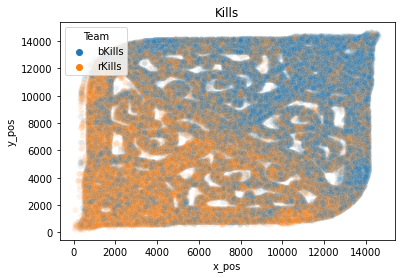

: 

In [ ]:
u = sns.scatterplot(data = dfKills, y='y_pos', x='x_pos', hue='Team', alpha=0.1)
u.set_title('Kills')

In [ ]:
EarlyKill = dfKills.loc[dfKills.Time <= 15]
MidKill = dfKills.loc[(dfKills.Time > 15) & (dfKills.Time < 25)]
LateKill = dfKills.loc[dfKills.Time > 25]

: 

Text(0.5, 1.0, 'Early Game')

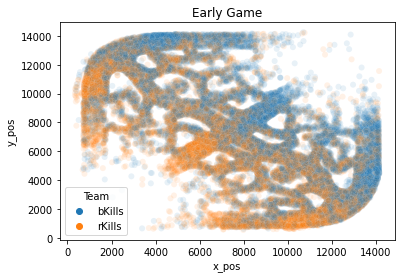

: 

In [ ]:
u = sns.scatterplot(data = EarlyKill, y='y_pos', x='x_pos', hue='Team', alpha=0.1, legend=True)
u.set_title('Early Game')

Text(0.5, 1.0, 'Mid Game')

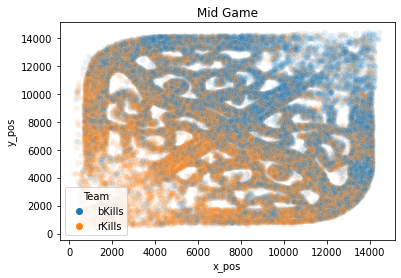

: 

In [ ]:
u = sns.scatterplot(data = MidKill, y='y_pos', x='x_pos', hue='Team', alpha=0.1)
u.set_title('Mid Game')

Text(0.5, 1.0, 'Late Game')

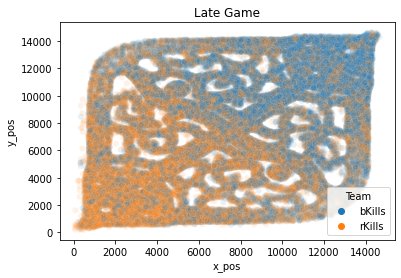

: 

In [ ]:
u = sns.scatterplot(data = LateKill, y='y_pos', x='x_pos', hue='Team', alpha=0.1)
u.set_title('Late Game')

### Analises de Ouro

In [ ]:
dfGold = pd.read_csv('Datasets/gold.csv')
dfGold.merge(df_jogos)

,Address,Type,min_1,min_2,min_3,min_4,min_5,min_6,min_7,min_8,...,min_87,min_88,min_89,min_90,min_91,min_92,min_93,min_94,min_95,IdJogo
0,http://matchhistory.na.leagueoflegends.com/en/...,golddiff,0,0,-14,-65,-268,-431,-488,-789,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,http://matchhistory.na.leagueoflegends.com/en/...,goldblue,2415,2415,2711,3887,5068,6171,7412,8661,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,http://matchhistory.na.leagueoflegends.com/en/...,goldred,2415,2415,2725,3952,5336,6602,7900,9450,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,http://matchhistory.na.leagueoflegends.com/en/...,goldblueTop,475,475,532,687,893,1058,1172,1471,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,http://matchhistory.na.leagueoflegends.com/en/...,goldblueJungle,475,475,532,870,1049,1276,1596,1815,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99055,https://matchhistory.na.leagueoflegends.com/en...,goldredTop,500,500,581,1005,1225,1600,1774,2196,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7619
99056,https://matchhistory.na.leagueoflegends.com/en...,goldredJungle,500,500,721,1015,1336,1614,1938,2230,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7619
99057,https://matchhistory.na.leagueoflegends.com/en...,goldredMiddle,500,500,598,968,1165,1477,1801,2016,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7619
99058,https://matchhistory.na.leagueoflegends.com/en...,goldredADC,500,500,587,954,1327,1749,2007,2471,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7619


: 

In [ ]:
dfGold.Type.unique()

array(['golddiff', 'goldblue', 'goldred', 'goldblueTop', 'goldblueJungle',
       'goldblueMiddle', 'goldblueADC', 'goldblueSupport', 'goldredTop',
       'goldredJungle', 'goldredMiddle', 'goldredADC', 'goldredSupport'],
      dtype=object)

: 

In [ ]:
dfGold_golddiff = dfGold.loc[dfGold.Type == 'golddiff'] 
dfGold_Team = dfGold.loc[(dfGold.Type == 'goldblue') |( dfGold.Type == 'goldred')]
dfGold_BlueChamps = dfGold.loc[ ( dfGold.Type == 'goldblueTop') |
                                ( dfGold.Type == 'goldblueJungle') |
                                ( dfGold.Type == 'goldblueMiddle') |
                                ( dfGold.Type == 'goldblueADC') |
                                ( dfGold.Type == 'goldblueSupport') ]
dfGold_RedChamps = dfGold.loc[ ( dfGold.Type == 'goldredTop') |
                                ( dfGold.Type == 'goldredJungle') |
                                ( dfGold.Type == 'goldredMiddle') |
                                ( dfGold.Type == 'goldredADC') |
                                ( dfGold.Type == 'goldredSupport') ]

: 

In [ ]:
dfGold_golddiff = dfGold_golddiff.replace(to_replace=np.nan, value=0)
dfGold_golddiff = dfGold_golddiff.merge(LeagueofLegends[['Address', 'bResult', 'golddiff']])
dfGold_golddiff.bResult = dfGold_golddiff.bResult.map({1 : 'Win', 0 : 'Loser'})
dfGold_golddiff

,Address,Type,min_1,min_2,min_3,min_4,min_5,min_6,min_7,min_8,...,min_88,min_89,min_90,min_91,min_92,min_93,min_94,min_95,bResult,golddiff
0,http://matchhistory.na.leagueoflegends.com/en/...,golddiff,0,0,-14,-65,-268,-431,-488,-789,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Win,"[0, 0, -14, -65, -268, -431, -488, -789, -494,..."
1,http://matchhistory.na.leagueoflegends.com/en/...,golddiff,0,0,-26,-18,147,237,-152,18,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Loser,"[0, 0, -26, -18, 147, 237, -152, 18, 88, -242,..."
2,http://matchhistory.na.leagueoflegends.com/en/...,golddiff,0,0,10,-60,34,37,589,1064,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Win,"[0, 0, 10, -60, 34, 37, 589, 1064, 1258, 913, ..."
3,http://matchhistory.na.leagueoflegends.com/en/...,golddiff,0,0,-15,25,228,-6,-243,175,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Loser,"[0, 0, -15, 25, 228, -6, -243, 175, -346, 16, ..."
4,http://matchhistory.na.leagueoflegends.com/en/...,golddiff,40,40,44,-36,113,158,-121,-191,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Win,"[40, 40, 44, -36, 113, 158, -121, -191, 23, 20..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7615,https://matchhistory.euw.leagueoflegends.com/e...,golddiff,0,0,-18,-95,45,-87,-117,199,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Loser,"[0, 0, -18, -95, 45, -87, -117, 199, 126, 92, ..."
7616,https://matchhistory.euw.leagueoflegends.com/e...,golddiff,0,0,-86,-39,-207,-349,-60,-140,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Loser,"[0, 0, -86, -39, -207, -349, -60, -140, 187, -..."
7617,https://matchhistory.na.leagueoflegends.com/en...,golddiff,0,-8,-6,116,103,-92,-470,-958,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Loser,"[0, -8, -6, 116, 103, -92, -470, -958, -1998, ..."
7618,https://matchhistory.na.leagueoflegends.com/en...,golddiff,0,0,-97,33,351,284,299,263,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Win,"[0, 0, -97, 33, 351, 284, 299, 263, 403, 623, ..."


: 

In [ ]:
type(LeagueofLegends['golddiff'][0][0])

str

: 